# Examples

Let's figure out how to perform k-fold cross validation. For this, we will use the university acceptance dataset from Monday again. If you need to download it again, do so at this [link](https://drive.google.com/open?id=13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d)

We will first start by creating a multivariate model, and assessing it's accuracy.

In [62]:
import numpy as np 

import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [63]:
#Load data 

data=pd.read_csv('uni_admission.csv')

In [64]:
X=data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y=data['admit_chance'].values 

 Train using 80% of the data.


In [65]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
regressor=LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
# assess the accuraccy of the model
y_pred=regressor.predict(X_test)

In [68]:
from sklearn import metrics 

print(' The Mean Absolute error is' ,  metrics.mean_absolute_error(y_test,y_pred))
print(' The Mean Squared error is' , metrics.mean_squared_error(y_test,y_pred))
print(' The Root  Mean Absolute error is' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

 The Mean Absolute error is 0.05691472219785118
 The Mean Squared error is 0.00572592647322867
 The Root  Mean Absolute error is 0.0756698518118588


Cross Validation with KFold 

In [69]:
from sklearn.model_selection import KFold

In [70]:
X=data[['GRE','TOEFL', 'SOP','LOR']].values
y=data['admit_chance'].values

X

array([[337. , 118. ,   4.5,   4.5],
       [324. , 107. ,   4. ,   4.5],
       [316. , 104. ,   3. ,   3.5],
       ...,
       [330. , 120. ,   4.5,   5. ],
       [312. , 103. ,   4. ,   5. ],
       [327. , 113. ,   4.5,   4.5]])

In [71]:
folds=KFold(n_splits=5)

In [72]:
print("We are using " + str(folds.get_n_splits(X)) + ' Folds')

We are using 5 Folds


In [73]:
RMSES=[]
count=1

for train_index, test_index in folds.split(X):

    print('\n Training model' + str(count))

    X_train, X_test= X[train_index], X[test_index]
    y_train, y_test= y[train_index],y[test_index]

    regressor=LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred=regressor.predict(X_test)

    rmse_value=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    RMSES.append(rmse_value)

    print('Model' + str(count) + ' Root Mean Squred Error:', rmse_value)

    count+=1






 Training model1
Model1 Root Mean Squred Error: 0.11384971151782929

 Training model2
Model2 Root Mean Squred Error: 0.06279391885787526

 Training model3
Model3 Root Mean Squred Error: 0.05049941911260591

 Training model4
Model4 Root Mean Squred Error: 0.06680059377472876

 Training model5
Model5 Root Mean Squred Error: 0.05995110606834264


In [74]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 500 folds
trained 501 models


0.05209496129447932

`In this scenario it is also helpful to plot out the RMSE values across all models`

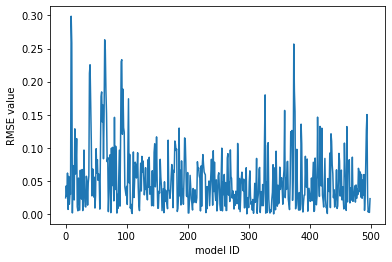

In [80]:
import matplotlib.pyplot as plt 

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()